In [19]:
# Irina Mukhametzhanova
# Robotics & Computer Vision
# Homework 3

In [20]:
# Problem 1

In [21]:
# Imports
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [22]:
# Termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,6,0)
# The dimensions of my board corners are 7x7
world_p = np.zeros((7*7,3), np.float32)
world_p[:,:2] = np.mgrid[0:7,0:7].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
world_coor = [] # 3d point in real world space
image_coor = [] # 2d points in image plane.

# Read all of the checkerboard images (attached to Canvas as .zip)
images = [cv2.imread('c1.JPG'),
cv2.imread('c2.JPG'),
cv2.imread('c3.JPG'),
cv2.imread('c4.JPG'),
cv2.imread('c5.JPG'),
cv2.imread('c6.JPG'),
cv2.imread('c7.JPG'),
cv2.imread('c8.JPG'),
cv2.imread('c9.JPG'),
cv2.imread('c10.JPG'),
cv2.imread('c11.JPG'),
cv2.imread('c12.JPG'),
cv2.imread('c13.JPG'),
cv2.imread('c14.JPG'),
cv2.imread('c15.JPG'),
cv2.imread('c16.JPG'),
cv2.imread('c17.JPG'),
cv2.imread('c18.JPG'),
cv2.imread('c19.JPG'),
cv2.imread('c20.JPG'),
cv2.imread('c21.JPG'),
cv2.imread('c22.JPG'),
cv2.imread('c23.JPG')]

# Find the corners for each image
for img in images:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    success, corners = cv2.findChessboardCorners(gray, (7,7), None)
    # If found, add object points and image points
    if success:
        world_coor.append(world_p)
        corners2 = cv2.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        image_coor.append(corners2)

In [23]:
# Get the cameras' extrinsic matrices and the camera matrix
ret, mtx, dist, Rv, t = cv2.calibrateCamera(world_coor, image_coor, gray.shape[::-1], None, None)

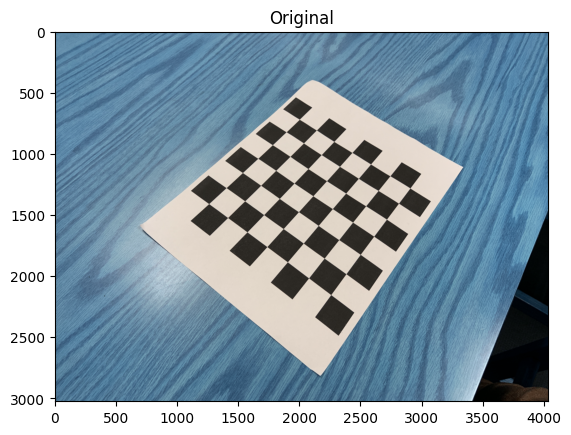

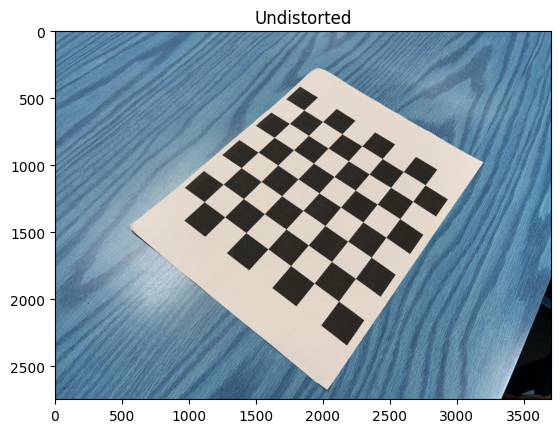

In [24]:
# Undistort one of the images
orig = cv2.imread('c21.JPG')
h,  w = img.shape[:2]
und_matrix, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

dst = cv2.undistort(orig, mtx, dist, None, und_matrix)

# Crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]

plt.imshow(orig)
plt.title("Original")
plt.show()
plt.imshow(dst)
plt.title("Undistorted")
plt.show()

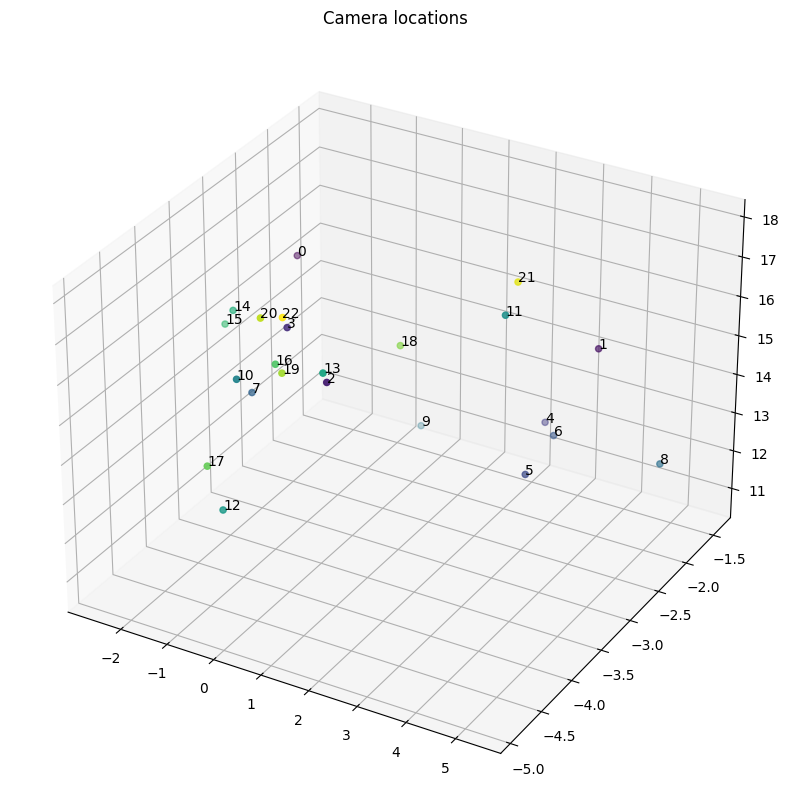

In [25]:
# Draw camera locations
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

#x = tvecs[0][0]
#y = tvecs[0][1]
#z = tvecs[0][2]
xc=[]
yc=[]
zc=[]

for i in range(0,23):
    xc.append(t[i][0])
    yc.append(t[i][1])
    zc.append(t[i][2])
    label = '%d' % (i)
    ax.text3D(t[i][0][0], t[i][1][0], t[i][2][0], label)

# Plot the camera points
ax.scatter3D(xc,yc,zc,c=range(0,23))

plt.axis('on')
plt.title("Camera locations")
plt.show()

In [26]:
# Problem 2

In [27]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D

In [28]:
# Make a figure in vertices
# Base (bottom), base (top), roof
# Refer to the PDF for a more detailed drawing of the wireframe
# From the Matlab example
house_vertices = np.array([[2,0,0],[3,0,0],[3,1,0],[2,1,0],[2,0,1],[3,0,1],[3,1,1],[2,1,1],[2.5,0.5,2]])

In [29]:
# Camera parameters
# Intrinsic K matrix
K = np.array([[-100,0,200],[0,-100,200],[0,0,1]])

# Extrinsic
Mextleft = np.array([[0.707,0.707,0,-3],[-0.707,0.707,0,-0.5],[0,0,1,3]])
Mextright = np.array([[0.866,-0.5,0,-3],[0.5,0.866,0,-0.5],[0,0,1,3]])

In [30]:
# Convert the wireframe to the camera projection
new_house_vertices_left = np.empty([9,3])
new_house_vertices_right = np.empty([9,3])

for i in range(0,9):
    new_house_vertices_left[i] = np.matmul(np.matmul(K, Mextleft),np.concatenate((house_vertices[i],[1])))
    new_house_vertices_right[i] = np.matmul(np.matmul(K, Mextright),np.concatenate((house_vertices[i],[1])))

    new_house_vertices_left[i] = new_house_vertices_left[i] / new_house_vertices_left[i,2]
    new_house_vertices_right[i] = new_house_vertices_right[i] / new_house_vertices_right[i,2]

Text(0.5, 1.0, 'Left camera view')

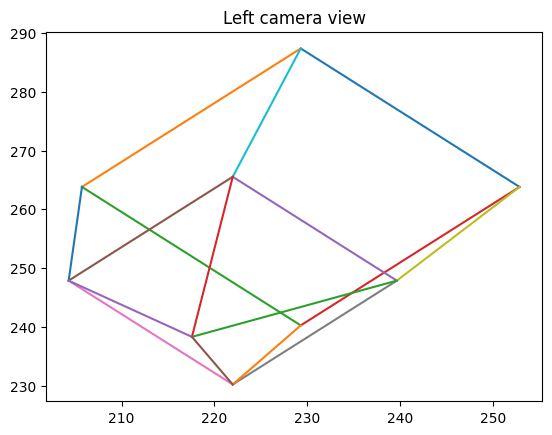

In [31]:
# Draw the new figure
# House's base (bottom)
line1 = Line2D([new_house_vertices_left[0,0], new_house_vertices_left[1,0]],[new_house_vertices_left[0,1], new_house_vertices_left[1,1]])
line2 = Line2D([new_house_vertices_left[1,0], new_house_vertices_left[2,0]],[new_house_vertices_left[1,1], new_house_vertices_left[2,1]])
line3 = Line2D([new_house_vertices_left[2,0], new_house_vertices_left[3,0]],[new_house_vertices_left[2,1], new_house_vertices_left[3,1]])
line4 = Line2D([new_house_vertices_left[3,0], new_house_vertices_left[0,0]],[new_house_vertices_left[3,1], new_house_vertices_left[0,1]])

# House's base (top)
line5 = Line2D([new_house_vertices_left[4,0], new_house_vertices_left[5,0]],[new_house_vertices_left[4,1], new_house_vertices_left[5,1]])
line6 = Line2D([new_house_vertices_left[5,0], new_house_vertices_left[6,0]],[new_house_vertices_left[5,1], new_house_vertices_left[6,1]])
line7 = Line2D([new_house_vertices_left[6,0], new_house_vertices_left[7,0]],[new_house_vertices_left[6,1], new_house_vertices_left[7,1]])
line8 = Line2D([new_house_vertices_left[7,0], new_house_vertices_left[4,0]],[new_house_vertices_left[7,1], new_house_vertices_left[4,1]])

# Connecting the two bases
line9 = Line2D([new_house_vertices_left[0,0], new_house_vertices_left[4,0]],[new_house_vertices_left[0,1], new_house_vertices_left[4,1]])
line10 = Line2D([new_house_vertices_left[1,0], new_house_vertices_left[5,0]],[new_house_vertices_left[1,1], new_house_vertices_left[5,1]])
line11 = Line2D([new_house_vertices_left[2,0], new_house_vertices_left[6,0]],[new_house_vertices_left[2,1], new_house_vertices_left[6,1]])
line12 = Line2D([new_house_vertices_left[3,0], new_house_vertices_left[7,0]],[new_house_vertices_left[3,1], new_house_vertices_left[7,1]])

# House's roof
line13 = Line2D([new_house_vertices_left[4,0], new_house_vertices_left[8,0]],[new_house_vertices_left[4,1], new_house_vertices_left[8,1]])
line14 = Line2D([new_house_vertices_left[5,0], new_house_vertices_left[8,0]],[new_house_vertices_left[5,1], new_house_vertices_left[8,1]])
line15 = Line2D([new_house_vertices_left[6,0], new_house_vertices_left[8,0]],[new_house_vertices_left[6,1], new_house_vertices_left[8,1]])
line16 = Line2D([new_house_vertices_left[7,0], new_house_vertices_left[8,0]],[new_house_vertices_left[7,1], new_house_vertices_left[8,1]])

# Draw each line
plt.plot(line1.get_data()[0], line1.get_data()[1])
plt.plot(line2.get_data()[0], line2.get_data()[1])
plt.plot(line3.get_data()[0], line3.get_data()[1])
plt.plot(line4.get_data()[0], line4.get_data()[1])
plt.plot(line5.get_data()[0], line5.get_data()[1])
plt.plot(line6.get_data()[0], line6.get_data()[1])
plt.plot(line7.get_data()[0], line7.get_data()[1])
plt.plot(line8.get_data()[0], line8.get_data()[1])
plt.plot(line9.get_data()[0], line9.get_data()[1])
plt.plot(line10.get_data()[0], line10.get_data()[1])
plt.plot(line11.get_data()[0], line11.get_data()[1])
plt.plot(line12.get_data()[0], line12.get_data()[1])
plt.plot(line13.get_data()[0], line13.get_data()[1])
plt.plot(line14.get_data()[0], line14.get_data()[1])
plt.plot(line15.get_data()[0], line15.get_data()[1])
plt.plot(line16.get_data()[0], line16.get_data()[1])

plt.title("Left camera view")

Text(0.5, 1.0, 'Right camera view')

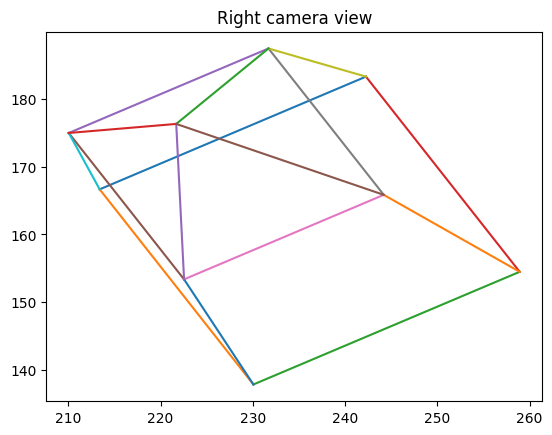

In [32]:
# Draw the new figure
# House's base (bottom)
line1 = Line2D([new_house_vertices_right[0,0], new_house_vertices_right[1,0]],[new_house_vertices_right[0,1], new_house_vertices_right[1,1]])
line2 = Line2D([new_house_vertices_right[1,0], new_house_vertices_right[2,0]],[new_house_vertices_right[1,1], new_house_vertices_right[2,1]])
line3 = Line2D([new_house_vertices_right[2,0], new_house_vertices_right[3,0]],[new_house_vertices_right[2,1], new_house_vertices_right[3,1]])
line4 = Line2D([new_house_vertices_right[3,0], new_house_vertices_right[0,0]],[new_house_vertices_right[3,1], new_house_vertices_right[0,1]])

# House's base (top)
line5 = Line2D([new_house_vertices_right[4,0], new_house_vertices_right[5,0]],[new_house_vertices_right[4,1], new_house_vertices_right[5,1]])
line6 = Line2D([new_house_vertices_right[5,0], new_house_vertices_right[6,0]],[new_house_vertices_right[5,1], new_house_vertices_right[6,1]])
line7 = Line2D([new_house_vertices_right[6,0], new_house_vertices_right[7,0]],[new_house_vertices_right[6,1], new_house_vertices_right[7,1]])
line8 = Line2D([new_house_vertices_right[7,0], new_house_vertices_right[4,0]],[new_house_vertices_right[7,1], new_house_vertices_right[4,1]])

# Connecting the two bases
line9 = Line2D([new_house_vertices_right[0,0], new_house_vertices_right[4,0]],[new_house_vertices_right[0,1], new_house_vertices_right[4,1]])
line10 = Line2D([new_house_vertices_right[1,0], new_house_vertices_right[5,0]],[new_house_vertices_right[1,1], new_house_vertices_right[5,1]])
line11 = Line2D([new_house_vertices_right[2,0], new_house_vertices_right[6,0]],[new_house_vertices_right[2,1], new_house_vertices_right[6,1]])
line12 = Line2D([new_house_vertices_right[3,0], new_house_vertices_right[7,0]],[new_house_vertices_right[3,1], new_house_vertices_right[7,1]])

# House's roof
line13 = Line2D([new_house_vertices_right[4,0], new_house_vertices_right[8,0]],[new_house_vertices_right[4,1], new_house_vertices_right[8,1]])
line14 = Line2D([new_house_vertices_right[5,0], new_house_vertices_right[8,0]],[new_house_vertices_right[5,1], new_house_vertices_right[8,1]])
line15 = Line2D([new_house_vertices_right[6,0], new_house_vertices_right[8,0]],[new_house_vertices_right[6,1], new_house_vertices_right[8,1]])
line16 = Line2D([new_house_vertices_right[7,0], new_house_vertices_right[8,0]],[new_house_vertices_right[7,1], new_house_vertices_right[8,1]])

# Draw each line
plt.plot(line1.get_data()[0], line1.get_data()[1])
plt.plot(line2.get_data()[0], line2.get_data()[1])
plt.plot(line3.get_data()[0], line3.get_data()[1])
plt.plot(line4.get_data()[0], line4.get_data()[1])
plt.plot(line5.get_data()[0], line5.get_data()[1])
plt.plot(line6.get_data()[0], line6.get_data()[1])
plt.plot(line7.get_data()[0], line7.get_data()[1])
plt.plot(line8.get_data()[0], line8.get_data()[1])
plt.plot(line9.get_data()[0], line9.get_data()[1])
plt.plot(line10.get_data()[0], line10.get_data()[1])
plt.plot(line11.get_data()[0], line11.get_data()[1])
plt.plot(line12.get_data()[0], line12.get_data()[1])
plt.plot(line13.get_data()[0], line13.get_data()[1])
plt.plot(line14.get_data()[0], line14.get_data()[1])
plt.plot(line15.get_data()[0], line15.get_data()[1])
plt.plot(line16.get_data()[0], line16.get_data()[1])

plt.title("Right camera view")

In [33]:
# Find the left and right rays
rightray = np.matmul(np.linalg.inv(K), np.array([new_house_vertices_right[0],new_house_vertices_right[1],new_house_vertices_right[2],new_house_vertices_right[3],
new_house_vertices_right[4],new_house_vertices_right[5],new_house_vertices_right[6],new_house_vertices_right[7],
new_house_vertices_right[8]]).transpose())

leftray = np.matmul(np.linalg.inv(K), np.array([new_house_vertices_left[0],new_house_vertices_left[1],new_house_vertices_left[2],new_house_vertices_left[3],
new_house_vertices_left[4],new_house_vertices_left[5],new_house_vertices_left[6],new_house_vertices_left[7],
new_house_vertices_left[8]]).transpose())

In [34]:
# Calculate transformation matrices of world wrt right and left cameras
Trw = np.concatenate((Mextright, np.array([[0,0,0,1]])), axis=0)
Tlw = np.concatenate((Mextleft, np.array([[0,0,0,1]])), axis=0)

# Invert
Twr = np.linalg.inv(Trw)
Twl = np.linalg.inv(Tlw)

# Calculate transformation of right camera wrt left camera
Tlr = np.matmul(Tlw, Twr)
Rlr = Tlr[0:3,0:3]
tlr = np.array([Tlr[0:3,3]])

# For storing
new_house_vertices_rec = np.empty([9,3])
new_house_vertices_rec_final = np.empty([9,3])

# For each vertex
for i in range(0,9):
    # Find where the distance between rays is smallest
    q = np.cross(leftray[:,i], np.matmul(Rlr, rightray[:,i]))
    q = q/np.linalg.norm(q)

    # Estimate
    A = np.concatenate(([leftray[:,i]], [-np.matmul(Rlr, rightray[:,i])]), axis=0)
    A = np.concatenate((A, [q]), axis=0)
    A = A.transpose()

    sol = np.matmul(np.linalg.inv(A),tlr.transpose())

    a = sol[0]
    b = sol[1]
    c = sol[2]

    # Reconstruct the wireframe
    new_house_vertices_rec[i] = a*leftray[:,i] + c*0.5*q
    new_house_vertices_rec_final[i] = np.matmul(Twl, [new_house_vertices_rec[i,0],new_house_vertices_rec[i,1],new_house_vertices_rec[i,2],1])[0:3]

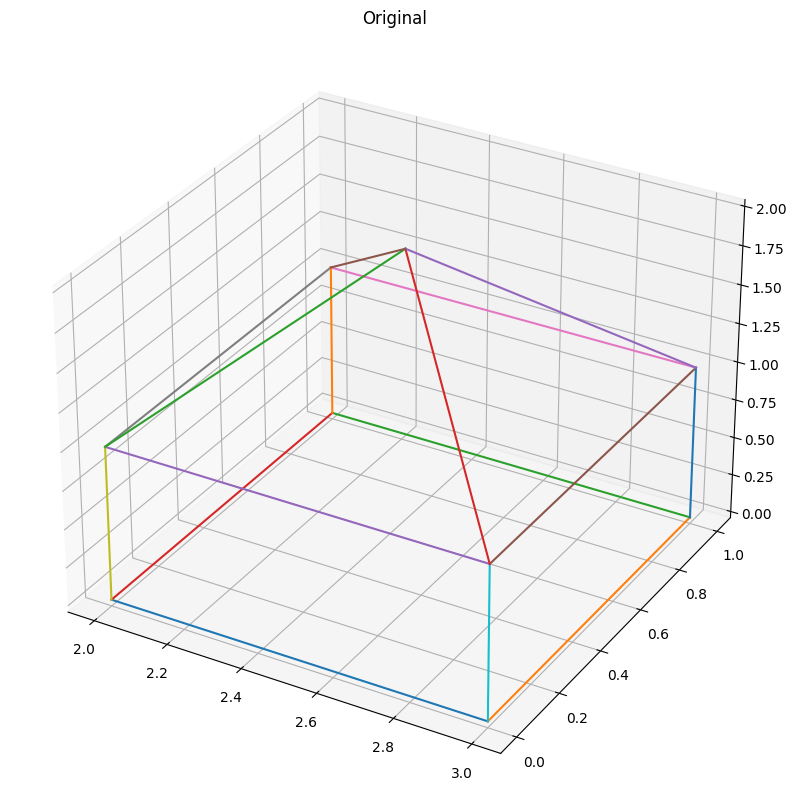

In [35]:
# Draw the original house
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

# Base
ax.plot([house_vertices[0,0],house_vertices[1,0]],[house_vertices[0,1],house_vertices[1,1]],[house_vertices[0,2],house_vertices[1,2]])
ax.plot([house_vertices[1,0],house_vertices[2,0]],[house_vertices[1,1],house_vertices[2,1]],[house_vertices[1,2],house_vertices[2,2]])
ax.plot([house_vertices[2,0],house_vertices[3,0]],[house_vertices[2,1],house_vertices[3,1]],[house_vertices[2,2],house_vertices[3,2]])
ax.plot([house_vertices[3,0],house_vertices[0,0]],[house_vertices[3,1],house_vertices[0,1]],[house_vertices[3,2],house_vertices[0,2]])

# Roof
ax.plot([house_vertices[4,0],house_vertices[5,0]],[house_vertices[4,1],house_vertices[5,1]],[house_vertices[4,2],house_vertices[5,2]])
ax.plot([house_vertices[5,0],house_vertices[6,0]],[house_vertices[5,1],house_vertices[6,1]],[house_vertices[5,2],house_vertices[6,2]])
ax.plot([house_vertices[6,0],house_vertices[7,0]],[house_vertices[6,1],house_vertices[7,1]],[house_vertices[6,2],house_vertices[7,2]])
ax.plot([house_vertices[7,0],house_vertices[4,0]],[house_vertices[7,1],house_vertices[4,1]],[house_vertices[7,2],house_vertices[4,2]])

# Connect
ax.plot([house_vertices[0,0],house_vertices[4,0]],[house_vertices[0,1],house_vertices[4,1]],[house_vertices[0,2],house_vertices[4,2]])
ax.plot([house_vertices[1,0],house_vertices[5,0]],[house_vertices[1,1],house_vertices[5,1]],[house_vertices[1,2],house_vertices[5,2]])
ax.plot([house_vertices[2,0],house_vertices[6,0]],[house_vertices[2,1],house_vertices[6,1]],[house_vertices[2,2],house_vertices[6,2]])
ax.plot([house_vertices[3,0],house_vertices[7,0]],[house_vertices[3,1],house_vertices[7,1]],[house_vertices[3,2],house_vertices[7,2]])

# Roof top
ax.plot([house_vertices[4,0],house_vertices[8,0]],[house_vertices[4,1],house_vertices[8,1]],[house_vertices[4,2],house_vertices[8,2]])
ax.plot([house_vertices[5,0],house_vertices[8,0]],[house_vertices[5,1],house_vertices[8,1]],[house_vertices[5,2],house_vertices[8,2]])
ax.plot([house_vertices[6,0],house_vertices[8,0]],[house_vertices[6,1],house_vertices[8,1]],[house_vertices[6,2],house_vertices[8,2]])
ax.plot([house_vertices[7,0],house_vertices[8,0]],[house_vertices[7,1],house_vertices[8,1]],[house_vertices[7,2],house_vertices[8,2]])

plt.axis('on')
plt.title("Original")
plt.show()


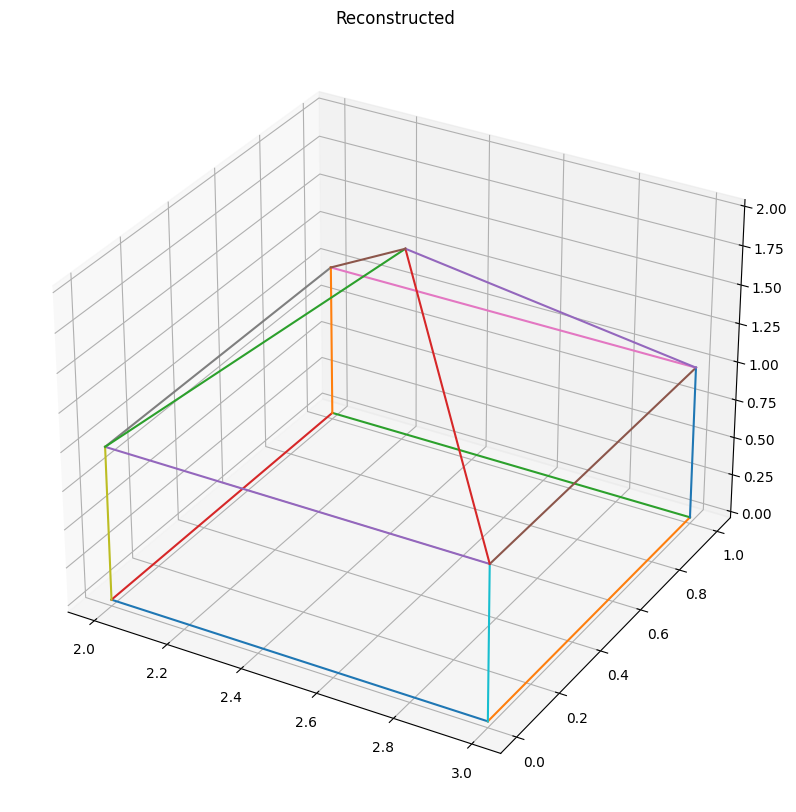

In [36]:
# Draw the reconstructed house
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

# Base
ax.plot([new_house_vertices_rec_final[0,0],new_house_vertices_rec_final[1,0]],[new_house_vertices_rec_final[0,1],new_house_vertices_rec_final[1,1]],[new_house_vertices_rec_final[0,2],new_house_vertices_rec_final[1,2]])
ax.plot([new_house_vertices_rec_final[1,0],new_house_vertices_rec_final[2,0]],[new_house_vertices_rec_final[1,1],new_house_vertices_rec_final[2,1]],[new_house_vertices_rec_final[1,2],new_house_vertices_rec_final[2,2]])
ax.plot([new_house_vertices_rec_final[2,0],new_house_vertices_rec_final[3,0]],[new_house_vertices_rec_final[2,1],new_house_vertices_rec_final[3,1]],[new_house_vertices_rec_final[2,2],new_house_vertices_rec_final[3,2]])
ax.plot([new_house_vertices_rec_final[3,0],new_house_vertices_rec_final[0,0]],[new_house_vertices_rec_final[3,1],new_house_vertices_rec_final[0,1]],[new_house_vertices_rec_final[3,2],new_house_vertices_rec_final[0,2]])

# Roof
ax.plot([new_house_vertices_rec_final[4,0],new_house_vertices_rec_final[5,0]],[new_house_vertices_rec_final[4,1],new_house_vertices_rec_final[5,1]],[new_house_vertices_rec_final[4,2],new_house_vertices_rec_final[5,2]])
ax.plot([new_house_vertices_rec_final[5,0],new_house_vertices_rec_final[6,0]],[new_house_vertices_rec_final[5,1],new_house_vertices_rec_final[6,1]],[new_house_vertices_rec_final[5,2],new_house_vertices_rec_final[6,2]])
ax.plot([new_house_vertices_rec_final[6,0],new_house_vertices_rec_final[7,0]],[new_house_vertices_rec_final[6,1],new_house_vertices_rec_final[7,1]],[new_house_vertices_rec_final[6,2],new_house_vertices_rec_final[7,2]])
ax.plot([new_house_vertices_rec_final[7,0],new_house_vertices_rec_final[4,0]],[new_house_vertices_rec_final[7,1],new_house_vertices_rec_final[4,1]],[new_house_vertices_rec_final[7,2],new_house_vertices_rec_final[4,2]])

# Connect
ax.plot([new_house_vertices_rec_final[0,0],new_house_vertices_rec_final[4,0]],[new_house_vertices_rec_final[0,1],new_house_vertices_rec_final[4,1]],[new_house_vertices_rec_final[0,2],new_house_vertices_rec_final[4,2]])
ax.plot([new_house_vertices_rec_final[1,0],new_house_vertices_rec_final[5,0]],[new_house_vertices_rec_final[1,1],new_house_vertices_rec_final[5,1]],[new_house_vertices_rec_final[1,2],new_house_vertices_rec_final[5,2]])
ax.plot([new_house_vertices_rec_final[2,0],new_house_vertices_rec_final[6,0]],[new_house_vertices_rec_final[2,1],new_house_vertices_rec_final[6,1]],[new_house_vertices_rec_final[2,2],new_house_vertices_rec_final[6,2]])
ax.plot([new_house_vertices_rec_final[3,0],new_house_vertices_rec_final[7,0]],[new_house_vertices_rec_final[3,1],new_house_vertices_rec_final[7,1]],[new_house_vertices_rec_final[3,2],new_house_vertices_rec_final[7,2]])

# Roof top
ax.plot([new_house_vertices_rec_final[4,0],new_house_vertices_rec_final[8,0]],[new_house_vertices_rec_final[4,1],new_house_vertices_rec_final[8,1]],[new_house_vertices_rec_final[4,2],new_house_vertices_rec_final[8,2]])
ax.plot([new_house_vertices_rec_final[5,0],new_house_vertices_rec_final[8,0]],[new_house_vertices_rec_final[5,1],new_house_vertices_rec_final[8,1]],[new_house_vertices_rec_final[5,2],new_house_vertices_rec_final[8,2]])
ax.plot([new_house_vertices_rec_final[6,0],new_house_vertices_rec_final[8,0]],[new_house_vertices_rec_final[6,1],new_house_vertices_rec_final[8,1]],[new_house_vertices_rec_final[6,2],new_house_vertices_rec_final[8,2]])
ax.plot([new_house_vertices_rec_final[7,0],new_house_vertices_rec_final[8,0]],[new_house_vertices_rec_final[7,1],new_house_vertices_rec_final[8,1]],[new_house_vertices_rec_final[7,2],new_house_vertices_rec_final[8,2]])

plt.axis('on')
plt.title("Reconstructed")
plt.show()
